### 1.Importing Libraries


In [37]:

# Library to handle datasets
import pandas as pd
import numpy as np

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Library for encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler

# Library for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Library for checking model accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

### 2.DATA IMPORT

In [48]:


import os
ROOT_PATH = r"../data/train"


df_1 = pd.read_csv(os.path.join(ROOT_PATH,"Insurance_Claim_Info_data.csv"))
df_2 = pd.read_csv(os.path.join(ROOT_PATH, r"Insurance_Date_data.csv"))
df_3 = pd.read_csv(os.path.join(ROOT_PATH,"Insurance_Result_data.csv"))

### 2.1 Merging the input data into one dataframe based on Claim Number

In [63]:


combined_df = df_1.merge(df_2, left_on='Claim Number', right_on='Claim Number').merge(df_3,left_on='Claim Number', right_on='Claim Number')

### 3.EDA

#### 3.1 Shape

In [86]:
# 3.1 Shape

combined_df.shape

(34110, 9)

### 3.2 Column Info

In [89]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34110 entries, 0 to 34109
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Code        34110 non-null  object 
 1   City             34110 non-null  object 
 2   Enterprise Type  34110 non-null  object 
 3   Claim Type       34110 non-null  object 
 4   Claim Site       34110 non-null  object 
 5   Product Insured  34110 non-null  object 
 6   Claim Amount     34110 non-null  float64
 7   Close Amount     34110 non-null  float64
 8   Disposition      34110 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.6+ MB


### 3.3 Checking Missing Values

In [90]:
combined_df.isnull().sum()

City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Claim Amount       0
Close Amount       0
Disposition        0
dtype: int64

### 3.4 Dataset

In [91]:
combined_df


,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount,Disposition
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00,Deny
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00,Settle
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98,Approve in Full
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00,Deny
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...
34105,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,238.00,115.60,Settle
34106,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,7.00,0.00,Deny
34107,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,166.00,70.00,Settle
34108,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,450.00,280.00,Settle


### 4.Analysis of Target Variable- Disposition

In [75]:
combined_df['Disposition'].value_counts()

Deny               17848
Approve in Full     9052
Settle              7210
Name: Disposition, dtype: int64

#### 4.1 Distribution of Target Variable

<AxesSubplot:xlabel='Disposition', ylabel='count'>

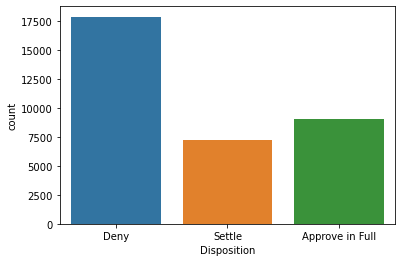

In [76]:


sns.countplot(x = 'Disposition', data = combined_df)

### 5. FEATURE ENGINEERING

#### 5.1 Dropping Claim Number,Incident Date and Date Received columns

In [77]:
combined_df.drop([ 'Claim Number','Incident Date','Date Received'],axis=1,inplace=True)

In [78]:
combined_df.head()

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount,Disposition
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00,Deny
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00,Settle
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98,Approve in Full
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00,Deny
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73,Settle


### 6. Splitting Independent Variables and Target Variable

In [80]:
x = combined_df.drop(['Disposition'], axis = 1)
y = combined_df['Disposition']

In [81]:
x['Product Insured'].value_counts() 

Inventory - Raw Material                                    8110
Misc. Electronic Items                                      5611
Misc. Engineering Tools                                     4247
Inventory - Finished Goods                                  3322
Furniture                                                   3034
Misc. Electrical Equipment                                  2945
Heating, ventilation, and air conditioning (HVAC) System    2787
Fixtures                                                    1065
Pumps and Motors                                            1025
Misc. Lab Equipment                                          695
Misc. Sensors                                                579
Property, Plant, and Equipment (PPE) Parts                   347
Cameras and other Misc. Security Equipment                   343
Name: Product Insured, dtype: int64

In [82]:
y

0                   Deny
1                 Settle
2        Approve in Full
3                   Deny
4                 Settle
              ...       
34105             Settle
34106               Deny
34107             Settle
34108             Settle
34109    Approve in Full
Name: Disposition, Length: 34110, dtype: object

### 7.Label Encoding Target Variable -0 - DENY,1 - SETTLED, 2 - APPROVED

In [93]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [94]:
pd.Series(y)

0        1
1        2
2        0
3        1
4        2
        ..
34105    2
34106    1
34107    2
34108    2
34109    0
Length: 34110, dtype: int64

### 8. Seperarting Categorical Variables

In [95]:
cat_vars = ['City Code','City','Enterprise Type','Claim Type','Claim Site','Product Insured']

### 9.Dummification of Categorical Variables

In [96]:
temp_df=pd.get_dummies(data=x, columns=cat_vars,dtype=int,drop_first=True)

### 10.Concatenating temp_df with Target to understand Correlation of Variables with Disposition

In [97]:
temp_df_2 = pd.concat([temp_df, pd.Series(y,name='Disposition')],axis=1)

In [98]:
temp_df_2

,Claim Amount,Close Amount,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,City Code_HYD,City Code_IDR,City Code_JAI,City Code_KNU,City Code_LKO,City Code_MAA,City Code_NGP,City Code_NSK,City Code_PAT,City Code_PNQ,City Code_STV,City Code_THN,City Code_VSK,City_Ahmedabad,City_Amritsar,City_Bangalore,City_Bhopal,City_Chennai,City_Coimbatore,City_Delhi,City_Hyderabad,City_Indore,City_Jaipur,City_Kanpur,City_Kolkata,City_Lucknow,City_Mumbai,City_Nagpur,City_Nashik,City_Patna,City_Pune,City_Surat,City_Thane,City_Vadodara,City_Visakhapatnam,Enterprise Type_Foreign Subsidary,Enterprise Type_Joint-Venture Company,Enterprise Type_Limited Liability Parterneship (LLP),Enterprise Type_Non-Profit Organization (NPO),Enterprise Type_One Person Company,Enterprise Type_Partnership Firm,Enterprise Type_Private Limited Company,Enterprise Type_Private Ltd. MSME - Medium,Enterprise Type_Private Ltd. MSME - Micro,Enterprise Type_Private Ltd. MSME - Small,Enterprise Type_Public Limited Company,Enterprise Type_Sole Proprietorship,Claim Type_Property Loss,Claim Site_Other,Claim Site_Warehouse,Product Insured_Fixtures,Product Insured_Furniture,"Product Insured_Heating, ventilation, and air conditioning (HVAC) System",Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors,Disposition
0,490.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,300.00,150.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,83.98,83.98,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,507.88,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,83.46,41.73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,238.00,115.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
34106,7.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
34107,166.00,70.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
34108,450.00,280.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2


#### 10.1 Correlation

In [22]:
"Disposition" in temp_df_2.corr().index.values.tolist()

True

In [23]:
y

array([1, 2, 0, ..., 2, 2, 0])

In [24]:
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Approve in Full': 0, 'Deny': 1, 'Settle': 2}

#### 10.2 Sorting the Correlation wrt Disposition

In [99]:
abs(temp_df_2.corr())['Disposition'].sort_values(ascending=False)

Disposition                                             1.000000
Product Insured_Inventory - Finished Goods              0.169303
Product Insured_Misc. Electrical Equipment              0.120861
Claim Site_Warehouse                                    0.068921
Product Insured_Inventory - Raw Material                0.066033
                                                          ...   
City Code_PNQ                                           0.000991
City_Pune                                               0.000991
Product Insured_Misc. Sensors                           0.000242
Enterprise Type_Limited Liability Parterneship (LLP)    0.000211
Enterprise Type_Non-Profit Organization (NPO)           0.000174
Name: Disposition, Length: 74, dtype: float64

In [26]:
temp_df_2.apply(lambda x : pd.factorize(x)[0])

,Claim Amount,Close Amount,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,City Code_HYD,City Code_IDR,City Code_JAI,City Code_KNU,City Code_LKO,City Code_MAA,City Code_NGP,City Code_NSK,City Code_PAT,City Code_PNQ,City Code_STV,City Code_THN,City Code_VSK,City_Ahmedabad,City_Amritsar,City_Bangalore,City_Bhopal,City_Chennai,City_Coimbatore,City_Delhi,City_Hyderabad,City_Indore,City_Jaipur,City_Kanpur,City_Kolkata,City_Lucknow,City_Mumbai,City_Nagpur,City_Nashik,City_Patna,City_Pune,City_Surat,City_Thane,City_Vadodara,City_Visakhapatnam,Enterprise Type_Foreign Subsidary,Enterprise Type_Joint-Venture Company,Enterprise Type_Limited Liability Parterneship (LLP),Enterprise Type_Non-Profit Organization (NPO),Enterprise Type_One Person Company,Enterprise Type_Partnership Firm,Enterprise Type_Private Limited Company,Enterprise Type_Private Ltd. MSME - Medium,Enterprise Type_Private Ltd. MSME - Micro,Enterprise Type_Private Ltd. MSME - Small,Enterprise Type_Public Limited Company,Enterprise Type_Sole Proprietorship,Claim Type_Property Loss,Claim Site_Other,Claim Site_Warehouse,Product Insured_Fixtures,Product Insured_Furniture,"Product Insured_Heating, ventilation, and air conditioning (HVAC) System",Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors,Disposition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,3126,6508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
34106,632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
34107,4777,156,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
34108,44,680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [28]:
temp_df_2.columns

Index(['Claim Amount', 'Close Amount', 'City Code_AMD', 'City Code_ATQ',
       'City Code_BDQ', 'City Code_BHO', 'City Code_BLR', 'City Code_BOM',
       'City Code_CCU', 'City Code_CJB', 'City Code_DEL', 'City Code_HYD',
       'City Code_IDR', 'City Code_JAI', 'City Code_KNU', 'City Code_LKO',
       'City Code_MAA', 'City Code_NGP', 'City Code_NSK', 'City Code_PAT',
       'City Code_PNQ', 'City Code_STV', 'City Code_THN', 'City Code_VSK',
       'City_Ahmedabad', 'City_Amritsar', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Coimbatore', 'City_Delhi', 'City_Hyderabad',
       'City_Indore', 'City_Jaipur', 'City_Kanpur', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Visakhapatnam', 'Enterprise Type_Foreign Subsidary',
       'Enterprise Type_Joint-Venture Company',
       'Enterprise Type_Limited Liability Parterneship (LLP)',
       'Ent

### 11. Independent Variables

In [100]:
x

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73
...,...,...,...,...,...,...,...,...
34105,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,238.00,115.60
34106,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,7.00,0.00
34107,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,166.00,70.00
34108,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,450.00,280.00


#### 12. TRAIN-TEST SPLIT

In [30]:
X_train, X_test, y_train, y_test = train_test_split(temp_df, y, test_size =0.3, stratify = y, random_state=120)

In [31]:
X_train.isnull().sum().sort_values(ascending=False)

Claim Amount                                  0
City_Mumbai                                   0
Enterprise Type_Private Ltd. MSME - Medium    0
Enterprise Type_Private Limited Company       0
Enterprise Type_Partnership Firm              0
                                             ..
City_Ahmedabad                                0
City Code_VSK                                 0
City Code_THN                                 0
City Code_STV                                 0
Product Insured_Pumps and Motors              0
Length: 73, dtype: int64

#### 13.BASE MODEL- support vector machine

In [101]:

svc = SVC()

# Train Classifer
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)
sva=accuracy_score(y_test, y_pred)
print("support vector machine Model Accuracy:", sva)

support vector machine Model Accuracy: 0.7748460861917327


#### 13.1 BASE MODEL CONFUSION MATRIX

In [102]:
confusion_matrix(y_test, y_pred)

array([[2710,    4,    2],
       [ 950, 4403,    1],
       [ 985,  362,  816]], dtype=int64)

13.2 BASE MODEL CLASSIFICATION REPORT

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2716
           1       0.92      0.82      0.87      5354
           2       1.00      0.38      0.55      2163

    accuracy                           0.77     10233
   macro avg       0.83      0.73      0.72     10233
weighted avg       0.85      0.77      0.77     10233



##### (LAZYPREDICT TO RUN ALL CLASSIFICATION MODELS)

In [34]:
#!pip install lazypredict

In [44]:
# from lazypredict.Supervised import LazyClassifier
# temp_model = LazyClassifier()

In [35]:
# temp_model.fit(X_train ,X_test,y_train, y_test)

#### 14.RANDOM FOREST CLASSIFIER PIPELINE WITH GRIDSEARCH

In [87]:


clf_rf = Pipeline(steps=[('classifier', RandomForestClassifier())])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

rf_param_grid = {"classifier__n_estimators" : [15,50,100],
              "classifier__max_depth" : [5,8,10],
              "classifier__max_features" : [3,5,7],
              "classifier__min_samples_leaf" : [4,6,8,10]}

rf_grid = GridSearchCV(clf_rf, param_grid = rf_param_grid, cv=kfold,verbose=3,n_jobs=6)
rf_grid.fit(X_train,y_train)

#print(rf_grid)

print(rf_grid.best_params_)

train_pred_rf = rf_grid.predict(X_train)
test_pred_rf = rf_grid.predict(X_test)

print (classification_report(y_true=y_test, y_pred= test_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'classifier__max_depth': 10, 'classifier__max_features': 7, 'classifier__min_samples_leaf': 8, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2716
           1       1.00      0.98      0.99      5354
           2       0.75      0.77      0.76      2163

    accuracy                           0.89     10233
   macro avg       0.85      0.85      0.85     10233
weighted avg       0.89      0.89      0.89     10233



### 15.DECISION TREE CLASSIFIER PIPELINE WITH GRIDSEARCH

In [88]:



clf_dt = Pipeline(steps=[('classifier', DecisionTreeClassifier())])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

dt_param_grid = {"classifier__criterion" : ['entropy', 'gini'],
                 "classifier__max_depth" : [6,8,10,12],
              "classifier__min_samples_split" : [2,10,20],
              "classifier__min_samples_leaf" : [1,5,10]}

dt_grid = GridSearchCV(clf_dt, param_grid = dt_param_grid, cv=kfold,verbose=3,n_jobs=6)
dt_grid.fit(X_train,y_train)

#print(dt_grid)

print(dt_grid.best_params_)

train_pred_dt = dt_grid.predict(X_train)
test_pred_dt = dt_grid.predict(X_test)

print (classification_report(y_true=y_test, y_pred= test_pred_dt))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 12, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2716
           1       1.00      0.98      0.99      5354
           2       0.98      0.95      0.96      2163

    accuracy                           0.98     10233
   macro avg       0.97      0.97      0.97     10233
weighted avg       0.98      0.98      0.98     10233



#### 16.BUILDING DECISION TREE CLASSIFIER MODEL WITH BEST PARAMETERS AND CALCULATING RECALL SCORE FOR MODEL

In [43]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12, min_samples_leaf= 10, min_samples_split= 2)

# Train Classifer
dt.fit(X_train, y_train)

#Predict the response for test dataset
y_prediction = dt.predict(X_test)
dt_recall=recall_score(y_test, y_prediction,average='weighted')
print("Decision Tree Model Recall Score:", dt_recall)

Decision Tree Model Recall Score: 0.9774259747874524


#### 17.EXPORTING MODEL USING PICKLE

In [46]:
import pickle

with open("dt_model.pkl", 'wb') as model_file:
    pickle.dump(dt, model_file)
    
with open("dt_model.pkl", "rb") as infile:
    dt_model = pickle.load(infile)     